# Calorimetry likelihood stopping muons

In [1]:
%load_ext autoreload
%autoreload 2

import math
from itertools import product
import uproot
import awkward
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import binned_statistic

import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from calo_likelihood import caloLikelihood
from helpers import *
from loaders import *
from plotter import *
from categorisation import *
from initializers import *

In [2]:
today = '19_11_25'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/stopping_muons/
save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/stopping_muons/'

In [4]:
branches = [
    'run',
    'sub',
    'evt',
    
    'backtracked_pdg',
    'backtracked_e',
    'backtracked_purity',
    'backtracked_completeness',
    'backtracked_overlay_purity',
    'backtracked_end_process',
    
    'backtracked_start_x',
    'backtracked_start_y',
    'backtracked_start_z',
    
    'backtracked_sce_start_x',
    'backtracked_sce_start_y',
    'backtracked_sce_start_z',
    
    'nplanehits_U',
    'nplanehits_V',
    'nplanehits_Y',
    'trk_score',

    'generation',
    'trk_daughters',
    'shr_daughters',

    'trk_sce_start_x',
    'trk_sce_start_y',
    'trk_sce_start_z',

    'trk_sce_end_x',
    'trk_sce_end_y',
    'trk_sce_end_z',
    
    'trk_theta',
    'trk_phi',

    'trk_dir_x',
    'trk_dir_y',
    'trk_dir_z',
    
#     'trk_pid_chipr_y',
#     'trk_pid_chipr_u',
#     'trk_pid_chipr_v',
#     'trk_pid_chimu_y',
#     'trk_bragg_p_y',
#     'trk_bragg_mu_y',

    'trk_len',
    'longest',
#     'dqdx_u',
#     'dqdx_v',
#     'dqdx_y',

    'dedx_u',
    'dedx_v',
    'dedx_y',

    'rr_u',
    'rr_v',
    'rr_y',

    'pitch_u',
    'pitch_v',
    'pitch_y',
    
    'dir_x_u',
    'dir_x_v',
    'dir_x_y',
    
    'dir_y_u',
    'dir_y_v',
    'dir_y_y',
    
    'dir_z_u',
    'dir_z_v',
    'dir_z_y',
]

In [5]:
directory = '/home/nic/Desktop/MicroBooNE/calorimetry_likelihood/'
pot_beam_on = 2.981e+19
n_triggers_on = 6610884.0
n_triggers_off = 38065349.0

file_lists = {}

file_lists['beam_on'] = directory+'v03/beam_on/out.root'
file_lists['beam_off'] = directory+'v03/beam_off/out.root'
file_lists['bnb_nu'] = directory+'v03/bnb_nu/out.root'
file_lists['bnb_dirt'] = directory+'v03/bnb_dirt/out.root'

folder = "nuselection"
events_tree_name = "CalorimetryAnalyzer"
pot_tree_name = "SubRun"

In [6]:
arrays, pot = load_data_calo(file_lists, 
                        branches, 
                        folder, 
                        events_tree_name, 
                        pot_tree_name, 
                        labels=['beam_on', 'beam_off', 'bnb_nu', 'bnb_dirt'])

start loading beam_on
start loading beam_off
start loading bnb_nu
start loading bnb_dirt
Done!


In [7]:
scale_factors = compute_scale_factors(pot, pot_beam_on, n_triggers_on, n_triggers_off)

In [8]:
for array in list(arrays.values()):
    initialisation_for_caloriemtry_data_mc(array)

In [9]:
scale_factors

{'beam_on': 1,
 'beam_off': 0.1736719660707695,
 'bnb_nu': 0.05100279933321981,
 'bnb_dirt': 0.11179464675847342}

# Plot data/MC agreement with test set

In [9]:
my_plotter = plotter(arrays, scale_factors, pot_beam_on)

In [10]:
# save_folder = save_folder_data_mc
def sel_function_base(array):
    return (array['longest'] == 1) &\
            (array['trk_score'] > 0.8) &\
            (array['start_is_fiducial']) &\
            (array['end_is_fiducial'])
     
title_base = 'Longest track, trk-score>0.8, start and end pints are fiducial'

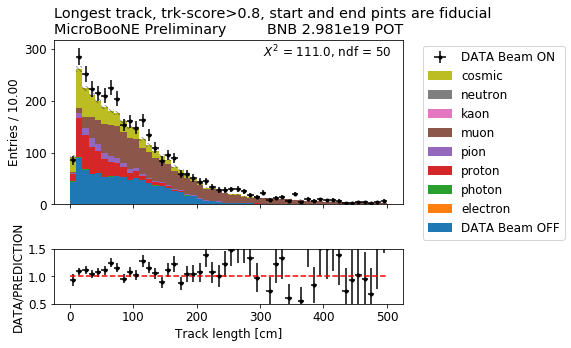

In [28]:
out = my_plotter.plot_pot_normalised_var(variable='trk_len',
                                   binning=[50, 0, 500], 
                                   categories=pdg_categories, 
                                   additional_selection=sel_function_base, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=r'Track length [cm]', 
                                   title=title_base,
                                   log=False, 
                                   subtracted=False, 
                                   onebin=False)
plt.savefig(save_folder + 'track_len.png', dpi=300)

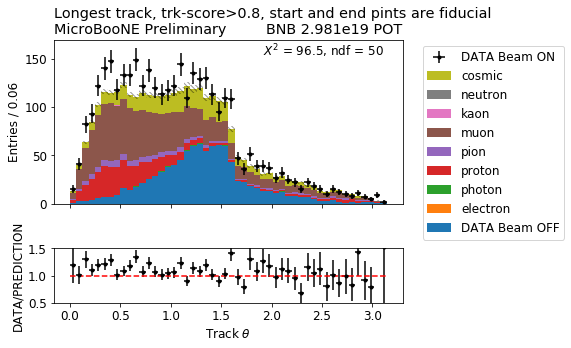

In [29]:
out = my_plotter.plot_pot_normalised_var(variable='trk_theta',
                                   binning=[50, 0, np.pi], 
                                   categories=pdg_categories, 
                                   additional_selection=sel_function_base, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=r'Track $\theta$', 
                                   title=title_base,
                                   log=False, 
                                   subtracted=False, 
                                   onebin=False)
plt.savefig(save_folder + 'track_theta.png', dpi=300)

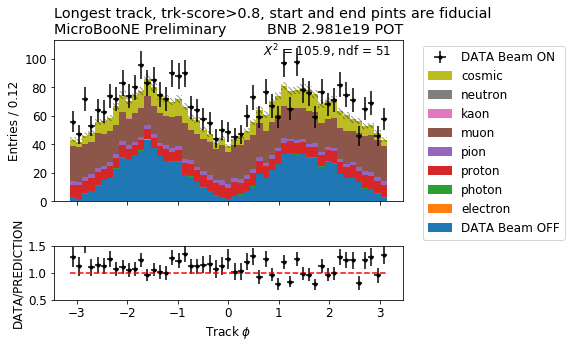

In [34]:
out = my_plotter.plot_pot_normalised_var(variable='trk_phi',
                                   binning=[51, -np.pi, np.pi], 
                                   categories=pdg_categories, 
                                   additional_selection=sel_function_base, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=r'Track $\phi$', 
                                   title=title_base,
                                   log=False, 
                                   subtracted=False, 
                                   onebin=False)
plt.savefig(save_folder + 'track_phi.png', dpi=300)

In [13]:
def sel_function_pitch(array):
    return sel_function_base(array) &\
            (array['pitch_y'] > 0) &\
            (array['first_last_hit_mask'+plane])

In [ ]:
out = my_plotter.plot_pot_normalised_var(variable='pitch_y',
                                   binning=[50, 0, 5], 
                                   categories=pdg_categories, 
                                   additional_selection=sel_function_pitch, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=r'dE/dx Y plane [MeV/cm]', 
                                   title=title_base,
                                   log=True, 
                                   subtracted=False, 
                                   onebin=False)
plt.savefig(save_folder + 'pitch_y.png', dpi=300)

bnb_dirt
bnb_nu


/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/plotter.py:178: RuntimeWarning: invalid value encountered in true_divide
  bin_contents_ratio = beam_on_values / bin_contents_prediction[-1]
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/plotter.py:179: RuntimeWarning: invalid value encountered in true_divide
  bin_relative_errors_prediction = bin_errors_prediction / bin_contents_prediction[-1]
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/plotter.py:180: RuntimeWarning: invalid value encountered in true_divide
  bin_relative_errors_data = beam_on_y_err / beam_on_values
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/plotter.py:201: RuntimeWarning: invalid value encountered in true_divide
  chi2_bins = (beam_on_values - bin_contents_prediction[-1])**2 / (bin_contents_prediction[-1] + bin_errors_prediction**2)


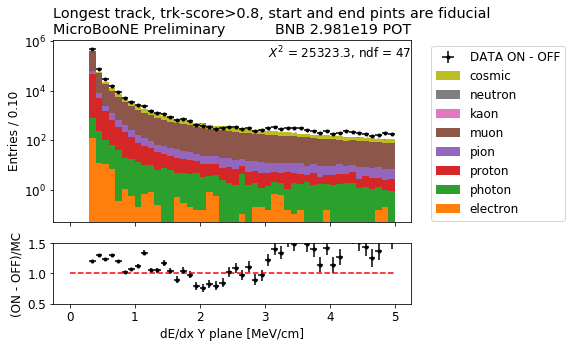

In [51]:
out = my_plotter.plot_pot_normalised_var(variable='pitch_y',
                                   binning=[50, 0, 5], 
                                   categories=pdg_categories, 
                                   additional_selection=sel_function_pitch, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=r'dE/dx Y plane [MeV/cm]', 
                                   title=title_base,
                                   log=True, 
                                   subtracted=True, 
                                   onebin=False)
plt.savefig(save_folder + 'pitch_y_subtracted.png', dpi=300)

In [ ]:
parameters_names = ['rr', 'pitch']
parameters_bin_edges = [[0., 2, 4, 7, 10, 15, 20, 30, 50, 100, 300, 2000],
                  [.0, 0.6, 1, 1.5, 3, 30]]

for plane_num, plane in zip([2, 1, 0], ['_y', '_v', '_u']):
    for par0_edges in zip(parameters_bin_edges[0][:-1], parameters_bin_edges[0][1:]):
        for par1_edges in zip(parameters_bin_edges[1][:-1], parameters_bin_edges[1][1:]):
            def sel_function(array):
                return sel_function_base(array) &\
                        (array['trk_len'] > 150) &\
                        (array['first_last_hit_mask'+plane]) &\
                        ((array[parameters_names[0]+plane]) > par0_edges[0]) &\
                        ((array[parameters_names[0]+plane]) <= par0_edges[1]) &\
                        ((array[parameters_names[1]+plane]) > par1_edges[0]) &\
                        ((array[parameters_names[1]+plane]) <= par1_edges[1])
            title = title_base + '\n plane {}, {} < {} < {} & {} < {} < {}'.format(plane_num, par0_edges[0], 
                                                         parameters_names[0],
                                                         par0_edges[1],
                                                         par1_edges[0], 
                                                         parameters_names[1],
                                                         par1_edges[1],)
            out = my_plotter.plot_pot_normalised_var(variable='dedx'+plane,
                                       binning=[60, 0, 20], 
                                       categories=pdg_categories, 
                                       additional_selection=sel_function, 
                                       prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                       xlabel=r'Hit dE/dx [MeV/cm]', 
                                       title=title,
                                       log=False,
                                       subtracted=False, 
                                       onebin=False)
            plt.savefig(save_folder + 'dedx{}_{}_{}_{}_{}_{}_{}.png'.format(plane, 
                                                                            par0_edges[0], 
                                                         parameters_names[0]+plane,
                                                         par0_edges[1],
                                                         par1_edges[0], 
                                                         parameters_names[1]+plane,
                                                         par1_edges[1]), dpi=300)
            plt.close()

/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/plotter.py:177: RuntimeWarning: invalid value encountered in true_divide
  bin_relative_errors_data = beam_on_y_err / beam_on_values
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/plotter.py:175: RuntimeWarning: divide by zero encountered in true_divide
  bin_contents_ratio = beam_on_values / bin_contents_prediction[-1]
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/plotter.py:175: RuntimeWarning: invalid value encountered in true_divide
  bin_contents_ratio = beam_on_values / bin_contents_prediction[-1]
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/plotter.py:176: RuntimeWarning: invalid value encountered in true_divide
  bin_relative_errors_prediction = bin_errors_prediction / bin_contents_prediction[-1]
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/plotter.py:198: RuntimeWarning: divide by zero encountered in true_divide
  chi2_bins = (beam_on_values - bin_contents_prediction[-1])**2 / (bin_contents_prediction[-1] + bin

In [10]:
mask = (arrays['bnb_nu']['backtracked_pdg'] == 22) & (arrays['bnb_nu']['trk_len'] >300) & (arrays['bnb_nu']['trk_score'] > 0.8)

In [11]:
(arrays['bnb_nu'][mask])['run']

<ChunkedArray [7352 7025 7010 6573 7020 7018 7001 ...] at 0x7f774e5871d0>

In [12]:
(arrays['bnb_nu'][mask])['sub']

<ChunkedArray [32 276 1693 7 905 410 1117 ...] at 0x7f799c5ca690>

In [13]:
(arrays['bnb_nu'][mask])['evt']

<ChunkedArray [1621 13849 84690 384 45284 20529 55886 ...] at 0x7f774963b2d0>

In [14]:
(arrays['bnb_nu'][mask])['trk_len']

<ChunkedArray [3213.3079 1083.3903 312.41956 1440.1841 700.133 403.9953 1340.5234 ...] at 0x7f7749402c90>

In [15]:
(arrays['bnb_nu'][mask])['trk_score']

<ChunkedArray [0.9983617 0.9945089 0.99659103 0.99973744 0.9096444 0.99425924 0.99997187 ...] at 0x7f7749396290>

In [16]:
(arrays['bnb_nu'][mask])['rr_v']

<ChunkedArray [[0.0 0.0 13.674438 ... 1161.4111 1177.3949 1178.8213] [0.14418875 0.43256623 5.6418343 ... 475.13647 475.47424 476.0146] [0.0 0.0 0.040618896 ... 241.27214 242.2816 242.85364] [0.0 0.0 0.0 ... 538.42865 539.1113 547.0037] [2.3128326 6.9384975 7.133484 ... 460.32486 477.7601 491.34302] [0.0 0.0 0.12864685 ... 186.91238 188.41704 189.11243] [0.0 0.20083618 0.7312622 ... 502.65482 503.78873 504.31085] ...] at 0x7f7749402a50>

In [21]:
(arrays['bnb_nu'][mask])['backtracked_completeness']

<ChunkedArray [0.7711229920387268 0.8155792355537415 0.9813084006309509 0.9419448375701904 0.875730037689209 0.9855595827102661 0.9402109980583191 ...] at 0x7f7749381b90>

In [18]:
(arrays['bnb_nu'][mask])['backtracked_purity']

<ChunkedArray [0.33488157 0.47315565 0.4642594 0.30060214 0.80375224 0.23636363 0.62705237 ...] at 0x7f7749402850>

In [20]:
(arrays['bnb_nu'][mask])['backtracked_overlay_purity']

<ChunkedArray [0.07895959 0.07763615 0.3227708 0.2561371 0.07772484 0.084848486 0.3729476 ...] at 0x7f77493816d0>

## Old code

In [5]:
directory = '/home/nic/Desktop/MicroBooNE/calorimetry_likelihood/v0_muons_david/'
pot_beam_on = 4.496e+19
n_triggers_on = 9984781.0
n_triggers_off = 28628549.0

file_lists = {}

file_lists['beam_on'] = directory+'data_bnb_optfilter_C1_5e19_goodruns_mcc9.1_reco2.root'
file_lists['beam_off'] = directory+'data_extbnb_mcc9.1_v08_00_00_16_run1_reco2.root'
file_lists['bnb_nu'] = directory+'prodgenie_bnb_nu_uboone_overlay_mcc9.1_run1_reco2.root'
file_lists['bnb_dirt'] = directory+'prodgenie_bnb_dirt_overlay_run1_mcc9.1_v08_00_00_16_reco2.root'

folder = "nuselection"
events_tree_name = "CalorimetryAnalyzer"
pot_tree_name = "SubRun"

In [6]:
file_name = '/home/nic/Desktop/MicroBooNE/calorimetry_likelihood/v03/bnb_nu/out.root'
file = uproot.open(file_name)

In [16]:
neutrino_sel_filter = file['nuselection']['NeutrinoSelectionFilter'].lazyarrays(branches=['run', 'sub', 'evt', 'weightSpline'], namedecode="utf-8")
calo_analyser = file['nuselection']['CalorimetryAnalyzer'].lazyarrays(branches=['run', 'sub', 'evt', 'trk_len'], namedecode="utf-8")

In [17]:
run_sub_evt_tuple = zip(neutrino_sel_filter['run'], neutrino_sel_filter['sub'], neutrino_sel_filter['evt'])
weight_dict = dict(zip(run_sub_evt_tuple, neutrino_sel_filter['weightSpline']))

In [18]:
calo_analyser['weightSpline'] = np.ones(len(calo_analyser['run']))
run_sub_evt_calo = zip(calo_analyser['run'], calo_analyser['sub'], calo_analyser['evt'])
for i, run_sub_evt_tuple in enumerate(run_sub_evt_calo):
    calo_analyser['weightSpline'][i] = weight_dict[run_sub_evt_tuple]